<a href="https://colab.research.google.com/github/IR04dy/Data-Analysis/blob/main/DATA_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
product_data = pd.read_csv('/content/Product Data Set - Student 2 of 3.csv',sep='|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [ ]:
customer_data = pd.read_csv('/content/Customer Data Set - Student 1 of 3.csv')
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


In [ ]:
transaction_data = pd.read_csv('/content/Transaction Data Set - Student 3 of 3.csv',sep='|')
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [ ]:
product_data.shape

(30, 3)

In [ ]:
customer_data.shape

(500, 9)

In [ ]:
transaction_data.shape

(10000, 6)

In [ ]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [ ]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [ ]:
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"51,498",3,notenrolled,NaN,1,Single


In [ ]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

In [ ]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [ ]:
customer_data['MARITAL STATUS'].describe()

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [ ]:
customer_data['MARITAL STATUS'].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [ ]:
customer_data['INCOME'].describe()

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

In [ ]:
from pandas.core.common import not_none
from datetime import datetime

customer_data['ENROLLMENT DATE'] =\
customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, '%d-%m-%Y'))

In [ ]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

**is there null values?**

In [ ]:
print('transaction :' , transaction_data.isnull().values.any())
print('product :' , product_data.isnull().values.any())
print('customer :' , customer_data.isnull().values.any())

transaction : False
product : False
customer : True


**which column have null values?**


In [ ]:
customer_data.columns[customer_data.isna().any()].tolist()

['ENROLLMENT DATE']

**Univariate Analysis (single variable analysis)**

<function matplotlib.pyplot.show>

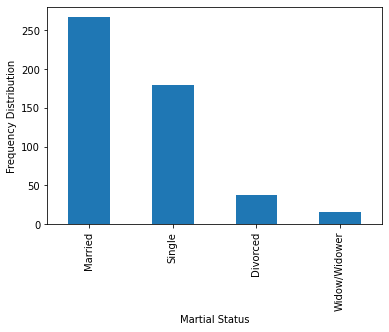

In [ ]:
customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel("Martial Status")
plt.ylabel("Frequency Distribution")
plt.show

**Histogram**

<function matplotlib.pyplot.show>

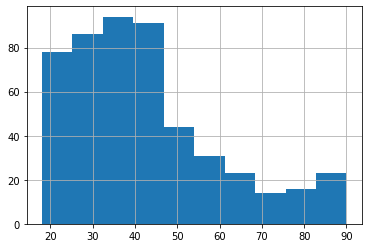

In [ ]:
customer_data['AGE'].hist(bins=10)
plt.show

** Box Plot **

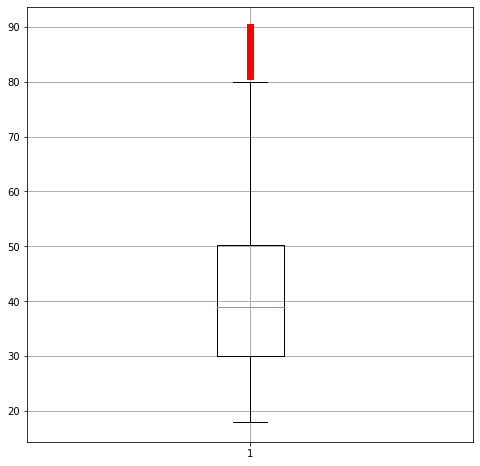

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(customer_data.AGE,0,'rs',1)
plt.grid( linestyle='-', linewidth=1)
plt.show()

In [ ]:
customer_data['AGE'].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

**Merge 2 Data set**

In [ ]:
product_transaction=transaction_data.merge(product_data, how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')
product_transaction.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


In [ ]:
product_transaction['UNIT LIST PRICE']=product_transaction['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [ ]:
product_transaction.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

**Derive new column**

In [ ]:
product_transaction['pay']=product_transaction['QUANTITY PURCHASED']*product_transaction['UNIT LIST PRICE']*(1-product_transaction['DISCOUNT TAKEN'])
product_transaction.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,pay
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


**Aggregate**

In [ ]:
Income_by_product= product_transaction.groupby('PRODUCT CATEGORY').agg({'pay':'sum'}).sort_values('pay',ascending=False)

In [ ]:
Income_by_product

,pay
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


**Pie chart**

In [ ]:
revenue_by_produc=Income_by_product.rename(columns={'pay':'Revenue per product'})

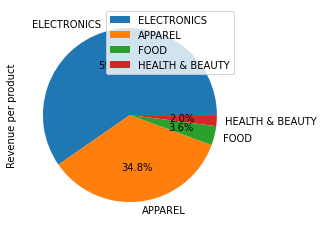

In [ ]:
revenue_by_produc['Revenue per product'].plot(kind='pie',autopct='%1.1f%%', legend=True)

**measures affects loyalty enrolment**

**Total spends per category**

In [ ]:
customer_product_category = product_transaction.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'pay':'sum'})
customer_product_category

pay
CUSTOMER NUM PRODUCT CATEGORY          
10001        APPAREL           4022.430
             ELECTRONICS       1601.315
             FOOD                68.688
             HEALTH & BEAUTY   1134.337
10002        APPAREL           2312.509
...                                 ...
10498        HEALTH & BEAUTY    320.145
10499        HEALTH & BEAUTY     20.010
10500        APPAREL           1511.748
             ELECTRONICS       2632.269
             FOOD                38.015

[1427 rows x 1 columns]

In [ ]:
customer_product_category.reset_index()

,CUSTOMER NUM,PRODUCT CATEGORY,pay
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509
...,...,...,...
1422,10498,HEALTH & BEAUTY,320.145
1423,10499,HEALTH & BEAUTY,20.010
1424,10500,APPAREL,1511.748
1425,10500,ELECTRONICS,2632.269


In [ ]:
customer_prod_categ=customer_product_category.reset_index()

pivot table.

In [ ]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='pay')
customer_pivot

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN
...,...,...,...,...
10496,4611.468,3616.106,186.110,87.780
10497,3404.527,5905.274,420.912,172.945
10498,1723.623,3424.110,783.588,320.145


**Total spends and most recent transactions by date**

In [ ]:
product_transaction['TRANSACTION DATE']=product_transaction['TRANSACTION DATE'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [ ]:
recent_tans_total_spend=product_transaction.groupby('CUSTOMER NUM').\
agg({'TRANSACTION DATE':'max','pay':'sum'}). \
rename(columns={'TRANSACTION DATE':'RECENT TRASACTION DATE','pay':'TOTAL SPENT'})
recent_tans_total_spend

,RECENT TRASACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512
...,...,...
10496,2015-12-08,8501.464
10497,2015-12-24,9903.658
10498,2015-12-23,6251.466


**JOIN TABLES**

In [ ]:
customer_KPIs=customer_pivot.merge(recent_tans_total_spend,how='inner',left_index=True,right_index=True)
customer_KPIs

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRASACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512
...,...,...,...,...,...,...
10496,4611.468,3616.106,186.110,87.780,2015-12-08,8501.464
10497,3404.527,5905.274,420.912,172.945,2015-12-24,9903.658
10498,1723.623,3424.110,783.588,320.145,2015-12-23,6251.466


fillna function to replace null with zeros

In [ ]:
customer_KPIs.fillna(0)

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRASACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512
...,...,...,...,...,...,...
10496,4611.468,3616.106,186.110,87.780,2015-12-08,8501.464
10497,3404.527,5905.274,420.912,172.945,2015-12-24,9903.658
10498,1723.623,3424.110,783.588,320.145,2015-12-23,6251.466


In [ ]:
customer_view = customer_data.merge(customer_KPIs,how='inner',left_on='CUSTOMERID', right_index=True)
customer_view

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRASACTION DATE,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,NaN,NaN,NaN,2015-12-22,213.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10496,0,47,113125,7,enrolled,2014-01-23,2,Single,4611.468,3616.106,186.110,87.780,2015-12-08,8501.464
496,10497,0,49,118108,7,enrolled,2007-10-01,1,Single,3404.527,5905.274,420.912,172.945,2015-12-24,9903.658
497,10498,0,42,97353,8,enrolled,2009-05-21,5,Married,1723.623,3424.110,783.588,320.145,2015-12-23,6251.466
498,10499,1,22,34424,1,notenrolled,NaT,2,Single,NaN,NaN,NaN,20.010,2015-12-18,20.010


**Bivariate Analysis (2-variable analysis): Loyalty as a target variable**

**Cross-tabulating gender with loyalty**

In [ ]:
table=pd.crosstab(customer_view['GENDER'],customer_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


<function matplotlib.pyplot.show>

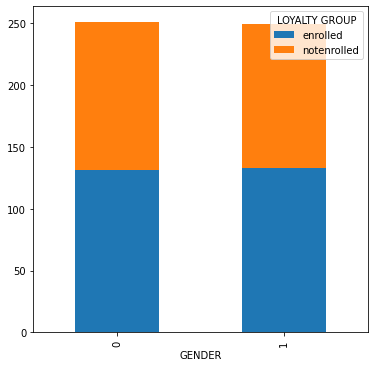

In [ ]:
table.plot(kind='bar', stacked=True, figsize=(6,6))
plt.show

In [ ]:
table=pd.crosstab(customer_view['EXPERIENCE SCORE'],customer_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


<function matplotlib.pyplot.show>

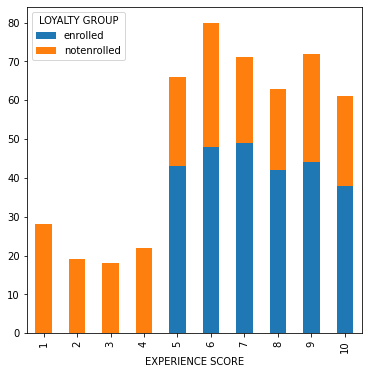

In [ ]:
table.plot(kind='bar', stacked=True, figsize=(6,6))
plt.show

In [ ]:
table=pd.crosstab(customer_view['MARITAL STATUS'],customer_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
MARITAL STATUS,,
Divorced,15,22
Married,144,123
Single,96,84
Widow/Widower,9,7


<function matplotlib.pyplot.show>

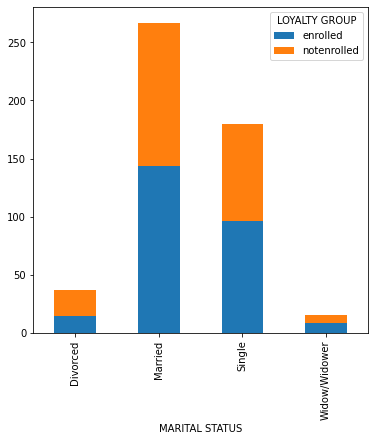

In [ ]:
table.plot(kind='bar', stacked=True, figsize=(6,6))
plt.show

In [ ]:
customer_view['AGE BINNED']= pd.cut(customer_view['AGE'],10)
customer_view['AGE BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(61.2, 68.4]      23
(82.8, 90.0]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE BINNED, dtype: int64

In [ ]:
table=pd.crosstab(customer_view['AGE BINNED'],customer_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
AGE BINNED,,
"(17.928, 25.2]",52,26
"(25.2, 32.4]",30,56
"(32.4, 39.6]",30,64
"(39.6, 46.8]",43,48
"(46.8, 54.0]",40,11
"(54.0, 61.2]",19,5
"(61.2, 68.4]",15,8
"(68.4, 75.6]",9,5
"(75.6, 82.8]",11,5


<function matplotlib.pyplot.show>

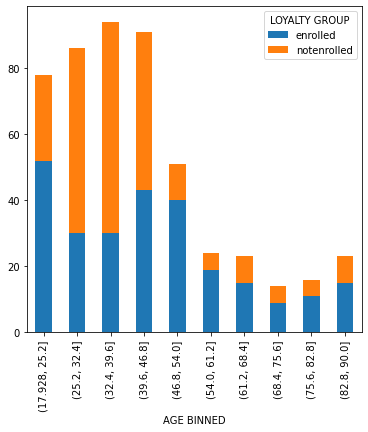

In [ ]:
table.plot(kind='bar', stacked=True, figsize=(6,6))
plt.show

In [ ]:
customer_view.groupby("LOYALTY GROUP").agg({'AGE':'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


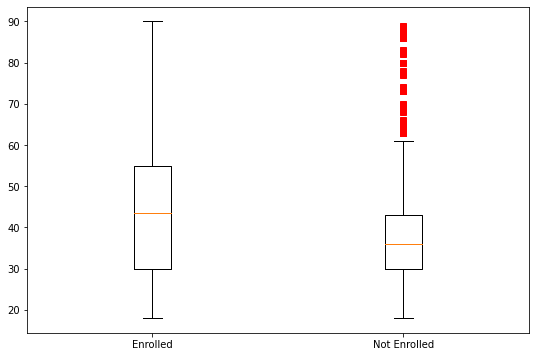

In [ ]:
fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot(111)
plot1=customer_view['AGE'][customer_view['LOYALTY GROUP'] =="enrolled"]
plot2=customer_view['AGE'][customer_view['LOYALTY GROUP'] == "notenrolled"]
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.show()

The distribution of age for enrolled customers is more dispersed than the same for non-enrolled ones. Enrolled customers have a higher median and quartiles, and a bigger IQR range than their non-enrolled counterparts.

The chart shows that 75% of customers that are enrolled in the loyalty program are below the age of 55, and 75% of non-enrolled customers are below the age of 43.

**Total Spend**

In [ ]:
customer_view['TOTAL SPENT BINNED'] = pd.cut(customer_view['TOTAL SPENT'], 10)

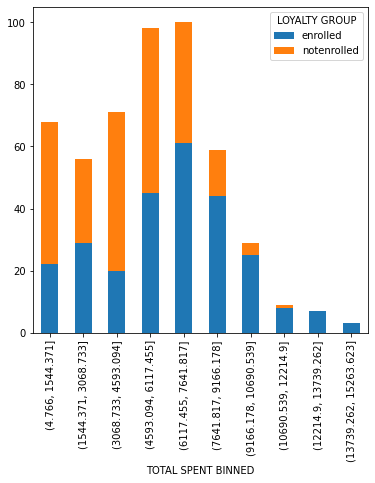

In [ ]:
table =pd.crosstab(customer_view['TOTAL SPENT BINNED'],customer_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

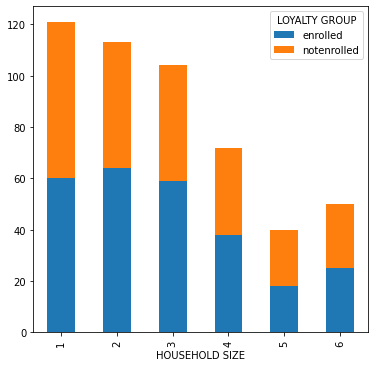

In [ ]:
table =pd.crosstab(customer_view['HOUSEHOLD SIZE'],customer_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

<function matplotlib.pyplot.show>

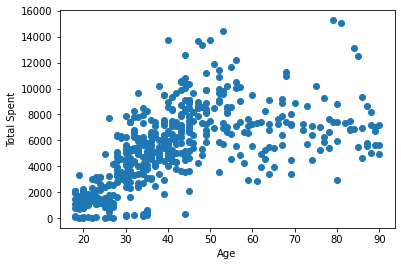

In [ ]:
plt.scatter(customer_view['AGE'],customer_view['TOTAL SPENT'])
plt.xlabel("Age")
plt.ylabel("Total Spent")
plt.show

The correlation between them can be quantified by a coefficient that is called **the Pearson correlation coefficient.**

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(customer_view['AGE'], customer_view['TOTAL SPENT'])

(0.5760170677259272, 1.560821750277651e-45)

<function matplotlib.pyplot.show>

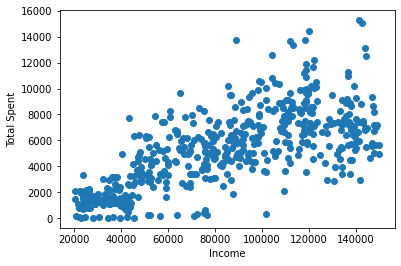

In [ ]:
plt.scatter(customer_view['INCOME'],customer_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show

In [ ]:
pearsonr(customer_view['INCOME'], customer_view['TOTAL SPENT'])

(0.688031108462512, 2.3226326963803363e-71)

In [ ]:
table = customer_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

,EXPERIENCE SCORE,TOTAL SPENT
0,1,3911.019036
1,2,4410.997842
2,3,3395.602222
3,4,4257.461455
4,5,6097.330864
5,6,5398.145675
6,7,5816.187268
7,8,5804.105016
8,9,5771.192042
9,10,5217.369574


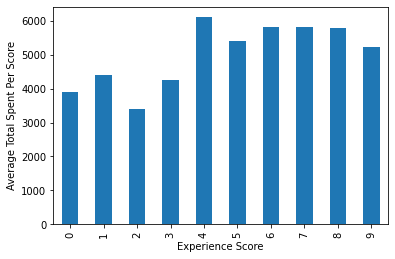

In [ ]:
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel("Experience Score")
plt.ylabel("Average Total Spent Per Score")
plt.show
table